In [57]:
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
import time

In [4]:
digits=[i for i in range(10)]
for i in range(len(digits)):
    digits[i]=np.array([*[cv2.imread(file) for
                          file in glob.glob("D:/hindi/Train/digit_"+str(i)+"/"+"*.png")]
        ,*[cv2.imread(file) for file in glob.glob("D:/hindi/Test/digit_"+str(i)+"/"+"*.png")]])
digits=np.array(digits)

In [6]:
y=[i for i in range(10)]
for i in range(len(y)):
    y[i]=np.full((2000,1),i)
y=np.array(y)

In [36]:
digits=digits.reshape(20000,32,32,3)
digits.shape

(20000, 32, 32, 3)

In [37]:
y=np.array(y)
y.shape

(20000,)

In [38]:
digits = digits.astype('float32')
y = y.astype('float32')
digits/=255

In [43]:
y = to_categorical(y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(digits, y, test_size=0.25, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15000, 32, 32, 3)
(5000, 32, 32, 3)
(15000, 10)
(5000, 10)


In [47]:
trainaccnodes=[]
testaccnodes=[]
timesnodes=[]
trainacclayers=[]
testacclayers=[]
timeslayers=[]

# Test run for just 32 nodes

In [69]:
model=Sequential()
model.add(Dense(32,input_shape=X_train.shape[1:],activation='sigmoid'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                327690    
Total params: 327,818
Trainable params: 327,818
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1405 - accuracy: 0.5700
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5613 - accuracy: 0.8317
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4719 - accuracy: 0.8719
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5674 - accuracy: 0.8712
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3746 - accuracy: 0.9105
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4428 - accuracy: 0.9020
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3906 - accuracy: 0.9118
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3435 - accuracy: 0.9229
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3158 - accuracy: 0.9244
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.3046 - accura

469/469 [==============================] - 2s 5ms/step - loss: 0.0104 - accuracy: 0.9958
Epoch 82/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9907
Epoch 83/100
469/469 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.99 - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9901
Epoch 84/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0112 - accuracy: 0.9959
Epoch 85/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0153 - accuracy: 0.9944
Epoch 86/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0130 - accuracy: 0.9948
Epoch 87/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 88/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0121 - accuracy: 0.9958
Epoch 89/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 90/100
469/469 [==============================]

In [73]:
print(model.evaluate(X_train,y_train)[1])
print(model.evaluate(X_test,y_test)[1])

469/469 [==============================] - 2s 4ms/step - loss: 0.0389 - accuracy: 0.9842
0.9842000007629395
157/157 [==============================] - 1s 4ms/step - loss: 0.3396 - accuracy: 0.9506
0.9506000280380249


# All Nodes

In [78]:
nodes=[8, 16, 32, 64, 128, 256, 512,1024]

In [79]:
for i in nodes:
    model=Sequential()
    model.add(Dense(i,input_shape=X_train.shape[1:],activation='sigmoid'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=100)
    timesnodes.append(time.time()-t)
    trainaccnodes.append(model.evaluate(X_train,y_train)[1])
    testaccnodes.append(model.evaluate(X_test,y_test)[1])

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9416 - accuracy: 0.7270
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3295 - accuracy: 0.8947
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2793 - accuracy: 0.9084
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2544 - accuracy: 0.9161
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2435 - accuracy: 0.9221: 0s - loss: 0
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2126 - accuracy: 0.9330
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1998 - accuracy: 0.9355
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1861 - accuracy: 0.9409
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1973 - accuracy: 0.9369
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0

469/469 [==============================] - 2s 4ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 81/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.9975
Epoch 82/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9980
Epoch 83/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0068 - accuracy: 0.9986
Epoch 84/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0076 - accuracy: 0.9983
Epoch 85/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0069 - accuracy: 0.9983
Epoch 86/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0122 - accuracy: 0.9958
Epoch 87/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0149 - accuracy: 0.9953
Epoch 88/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9979
Epoch 89/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0065 - accuracy: 

469/469 [==============================] - 2s 4ms/step - loss: 0.0214 - accuracy: 0.9921
Epoch 59/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0204 - accuracy: 0.9929
Epoch 60/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0244 - accuracy: 0.9918
Epoch 61/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9897
Epoch 62/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0172 - accuracy: 0.9940
Epoch 63/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 64/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 65/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 66/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0222 - accuracy: 0.9921
Epoch 67/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 

469/469 [==============================] - 2s 5ms/step - loss: 0.0615 - accuracy: 0.9786: 0s - loss: 0.0619 - accuracy: 0.97
Epoch 37/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9799
Epoch 38/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0532 - accuracy: 0.9812
Epoch 39/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0522 - accuracy: 0.9823
Epoch 40/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0634 - accuracy: 0.9789
Epoch 41/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0464 - accuracy: 0.9847
Epoch 42/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0511 - accuracy: 0.9833
Epoch 43/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0492 - accuracy: 0.9827
Epoch 44/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0485 - accuracy: 0.9837
Epoch 45/100
469/469 [==============================] - 2s 

469/469 [==============================] - 3s 7ms/step - loss: 0.4043 - accuracy: 0.9271
Epoch 15/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3455 - accuracy: 0.9337
Epoch 16/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3270 - accuracy: 0.9365
Epoch 17/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2719 - accuracy: 0.9431
Epoch 18/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2634 - accuracy: 0.9403
Epoch 19/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2415 - accuracy: 0.9451
Epoch 20/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2133 - accuracy: 0.9493
Epoch 21/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2087 - accuracy: 0.9493
Epoch 22/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1999 - accuracy: 0.9504
Epoch 23/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1612 - accuracy: 

469/469 [==============================] - 3s 7ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 95/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0061 - accuracy: 0.9979
Epoch 96/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0098 - accuracy: 0.9966
Epoch 97/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0421 - accuracy: 0.9859
Epoch 98/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0146 - accuracy: 0.9955
Epoch 99/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 100/100
157/157 [==============================] - 1s 5ms/step - loss: 0.2809 - accuracy: 0.9640
Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 17.7215 - accuracy: 0.3903
Epoch 2/100
469/469 [==============================] - 4s 10ms/step - loss: 1.4907 - accuracy: 0.7413
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 1.3969 - accuracy

469/469 [==============================] - 5s 11ms/step - loss: 0.0292 - accuracy: 0.9897
Epoch 69/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0404 - accuracy: 0.9874
Epoch 70/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0300 - accuracy: 0.9899
Epoch 71/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 72/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0186 - accuracy: 0.9937
Epoch 73/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0185 - accuracy: 0.9933
Epoch 74/100
469/469 [==============================] - 4s 10ms/step - loss: 0.0340 - accuracy: 0.9883
Epoch 75/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0271 - accuracy: 0.9907
Epoch 76/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0192 - accuracy: 0.9929
Epoch 77/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0213 - a

469/469 [==============================] - 7s 15ms/step - loss: 0.0822 - accuracy: 0.9735
Epoch 46/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0736 - accuracy: 0.9750
Epoch 47/100
469/469 [==============================] - 8s 16ms/step - loss: 0.0609 - accuracy: 0.9802
Epoch 48/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0607 - accuracy: 0.9801
Epoch 49/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0565 - accuracy: 0.9814 0s - loss: 0.0566 - accuracy: 0.
Epoch 50/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0642 - accuracy: 0.9775
Epoch 51/100
469/469 [==============================] - 7s 16ms/step - loss: 0.0562 - accuracy: 0.9806
Epoch 52/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0604 - accuracy: 0.9790
Epoch 53/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0457 - accuracy: 0.9847
Epoch 54/100
469/469 [==============================]

469/469 [==============================] - 12s 26ms/step - loss: 0.8350 - accuracy: 0.9337
Epoch 20/100
469/469 [==============================] - 12s 26ms/step - loss: 0.7635 - accuracy: 0.9325
Epoch 21/100
469/469 [==============================] - 13s 28ms/step - loss: 0.6116 - accuracy: 0.9351
Epoch 22/100
469/469 [==============================] - 13s 27ms/step - loss: 0.5342 - accuracy: 0.9383
Epoch 23/100
469/469 [==============================] - 13s 27ms/step - loss: 0.3879 - accuracy: 0.9441
Epoch 24/100
469/469 [==============================] - 13s 27ms/step - loss: 0.4105 - accuracy: 0.9349
Epoch 25/100
469/469 [==============================] - 13s 27ms/step - loss: 0.3400 - accuracy: 0.9401
Epoch 26/100
469/469 [==============================] - 13s 27ms/step - loss: 0.2844 - accuracy: 0.9442
Epoch 27/100
469/469 [==============================] - 13s 27ms/step - loss: 0.2545 - accuracy: 0.9429
Epoch 28/100
469/469 [==============================] - 13s 27ms/step - loss:

469/469 [==============================] - 12s 26ms/step - loss: 0.0580 - accuracy: 0.9807
Epoch 98/100
469/469 [==============================] - 12s 26ms/step - loss: 0.0550 - accuracy: 0.9823
Epoch 99/100
469/469 [==============================] - 12s 26ms/step - loss: 0.0601 - accuracy: 0.9807
Epoch 100/100
157/157 [==============================] - 2s 12ms/step - loss: 0.2424 - accuracy: 0.9476
Epoch 1/100
469/469 [==============================] - 24s 52ms/step - loss: 136.3782 - accuracy: 0.3716
Epoch 2/100
469/469 [==============================] - 24s 52ms/step - loss: 9.7943 - accuracy: 0.7617
Epoch 3/100
469/469 [==============================] - 23s 50ms/step - loss: 8.9934 - accuracy: 0.8234
Epoch 4/100
469/469 [==============================] - 24s 50ms/step - loss: 9.5068 - accuracy: 0.8463
Epoch 5/100
469/469 [==============================] - 24s 50ms/step - loss: 8.7755 - accuracy: 0.8770
Epoch 6/100
469/469 [==============================] - 24s 50ms/step - loss: 7.9

469/469 [==============================] - 23s 49ms/step - loss: 0.0889 - accuracy: 0.9723
Epoch 72/100
469/469 [==============================] - 23s 50ms/step - loss: 0.0877 - accuracy: 0.9714
Epoch 73/100
469/469 [==============================] - 24s 50ms/step - loss: 0.0957 - accuracy: 0.9675
Epoch 74/100
469/469 [==============================] - 24s 50ms/step - loss: 0.0898 - accuracy: 0.9713
Epoch 75/100
469/469 [==============================] - 24s 50ms/step - loss: 0.0874 - accuracy: 0.9703
Epoch 76/100
469/469 [==============================] - 24s 51ms/step - loss: 0.0914 - accuracy: 0.9697
Epoch 77/100
469/469 [==============================] - 24s 51ms/step - loss: 0.0871 - accuracy: 0.9717
Epoch 78/100
469/469 [==============================] - 24s 51ms/step - loss: 0.0823 - accuracy: 0.9730
Epoch 79/100
469/469 [==============================] - 23s 50ms/step - loss: 0.0820 - accuracy: 0.9747
Epoch 80/100
469/469 [==============================] - 23s 50ms/step - loss:

In [83]:
print(len(nodes))
print(len(trainaccnodes))
print(len(testaccnodes))
print(len(timesnodes))

8
8
8
8


In [84]:
print(nodes)
print(trainaccnodes)
print(testaccnodes)
print(timesnodes)

[8, 16, 32, 64, 128, 256, 512, 1024]
[0.9994000196456909, 0.9968000054359436, 0.9986666440963745, 0.999666690826416, 0.9969333410263062, 0.9990000128746033, 0.9775333404541016, 0.9757999777793884]
[0.9620000123977661, 0.9595999717712402, 0.9611999988555908, 0.9639999866485596, 0.9611999988555908, 0.9607999920845032, 0.9476000070571899, 0.9412000179290771]
[179.08941054344177, 183.3299696445465, 223.22921538352966, 326.832218170166, 469.10913705825806, 727.8005630970001, 1268.0864100456238, 2380.3101947307587]


# All Layers

In [85]:
layers=[2,3,4,5]

In [86]:
for i in range(len(layers)):
    model=Sequential()
    for i in range(layers[i]):
        model.add(Dense(32,input_shape=X_train.shape[1:],activation='sigmoid'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=100)
    timeslayers.append(time.time()-t)
    trainacclayers.append(model.evaluate(X_train,y_train)[1])
    testacclayers.append(model.evaluate(X_test,y_test)[1])

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 2.6719 - accuracy: 0.4111
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.3648 - accuracy: 0.8837
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2646 - accuracy: 0.9135
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2127 - accuracy: 0.9320
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1879 - accuracy: 0.9393
Epoch 6/100
469/469 [==============================] - 4s 7ms/step - loss: 0.1606 - accuracy: 0.9480
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1500 - accuracy: 0.9518
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1368 - accuracy: 0.9583
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1259 - accuracy: 0.9602
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1153 - accura

469/469 [==============================] - 4s 7ms/step - loss: 4.8829e-04 - accuracy: 1.0000
Epoch 82/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0038 - accuracy: 0.9987
Epoch 83/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0135 - accuracy: 0.9958
Epoch 84/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 85/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 86/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 87/100
469/469 [==============================] - 3s 7ms/step - loss: 5.0695e-04 - accuracy: 1.0000
Epoch 88/100
469/469 [==============================] - 3s 7ms/step - loss: 4.1402e-04 - accuracy: 1.0000
Epoch 89/100
469/469 [==============================] - 3s 7ms/step - loss: 3.8060e-04 - accuracy: 1.0000
Epoch 90/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0

469/469 [==============================] - 4s 9ms/step - loss: 0.0495 - accuracy: 0.9825
Epoch 60/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0431 - accuracy: 0.9853
Epoch 61/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0378 - accuracy: 0.9881
Epoch 62/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0451 - accuracy: 0.9854
Epoch 63/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0486 - accuracy: 0.9825
Epoch 64/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0367 - accuracy: 0.9881
Epoch 65/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0419 - accuracy: 0.9865
Epoch 66/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0334 - accuracy: 0.9897
Epoch 67/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0441 - accuracy: 0.9853
Epoch 68/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0393 - accuracy:

Epoch 37/100
469/469 [==============================] - 5s 11ms/step - loss: 0.0857 - accuracy: 0.9724
Epoch 38/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0829 - accuracy: 0.9742
Epoch 39/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0793 - accuracy: 0.9743
Epoch 40/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0783 - accuracy: 0.9751
Epoch 41/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0791 - accuracy: 0.9746
Epoch 42/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0705 - accuracy: 0.9775
Epoch 43/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0713 - accuracy: 0.9768
Epoch 44/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0695 - accuracy: 0.9779
Epoch 45/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0657 - accuracy: 0.9783
Epoch 46/100
469/469 [==============================] - 5s 10ms/step - lo

469/469 [==============================] - 6s 13ms/step - loss: 2.3031 - accuracy: 0.0991 0s - loss: 2.3031 - accuracy: 0.
Epoch 15/100
469/469 [==============================] - 6s 13ms/step - loss: 2.3031 - accuracy: 0.0975
Epoch 16/100
469/469 [==============================] - 6s 13ms/step - loss: 2.3030 - accuracy: 0.0968
Epoch 17/100
469/469 [==============================] - 6s 13ms/step - loss: 2.3029 - accuracy: 0.0991 0s - los
Epoch 18/100
469/469 [==============================] - 6s 13ms/step - loss: 2.3029 - accuracy: 0.1011
Epoch 19/100
469/469 [==============================] - 6s 12ms/step - loss: 2.3029 - accuracy: 0.0975
Epoch 20/100
469/469 [==============================] - 6s 13ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 21/100
469/469 [==============================] - 6s 12ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 22/100
469/469 [==============================] - 6s 12ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 23/100
469/469 [======================

469/469 [==============================] - 6s 14ms/step - loss: 0.0551 - accuracy: 0.9819
Epoch 94/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0476 - accuracy: 0.9835
Epoch 95/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0466 - accuracy: 0.9840
Epoch 96/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0500 - accuracy: 0.9825
Epoch 97/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0429 - accuracy: 0.9849
Epoch 98/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0486 - accuracy: 0.9833
Epoch 99/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0498 - accuracy: 0.9841
Epoch 100/100
157/157 [==============================] - 1s 9ms/step - loss: 0.3744 - accuracy: 0.9382


In [88]:
print(len(layers))
print(len(trainacclayers))
print(len(testacclayers))
print(len(timeslayers))

4
4
4
4


In [89]:
print(layers)
print(trainacclayers)
print(testacclayers)
print(timeslayers)

[2, 3, 4, 5]
[1.0, 0.9990000128746033, 1.0, 0.9894000291824341]
[0.9620000123977661, 0.9521999955177307, 0.9459999799728394, 0.9381999969482422]
[337.06676292419434, 403.6271057128906, 488.9639723300934, 600.1119096279144]


# Plots

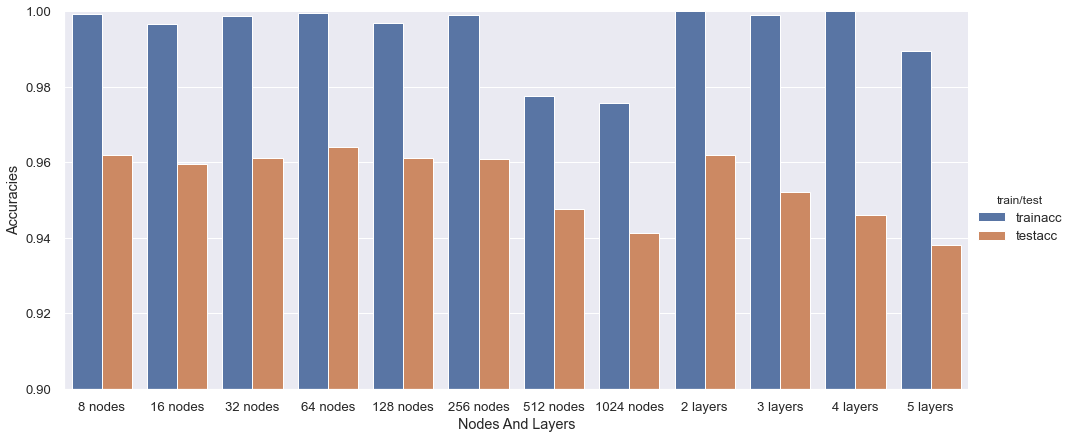

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
layers=[str(i) for i in layers]
nodes=[str(i) for i in nodes]
sns.set(font_scale=1.2)
data={'Nodes And Layers':[str(i)+" nodes" for i in nodes]+[str(i)+" layers" for i in layers]
      ,'trainacc':trainaccnodes+trainacclayers
      ,'testacc':testaccnodes+testacclayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Nodes And Layers", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Nodes And Layers', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.9,1))

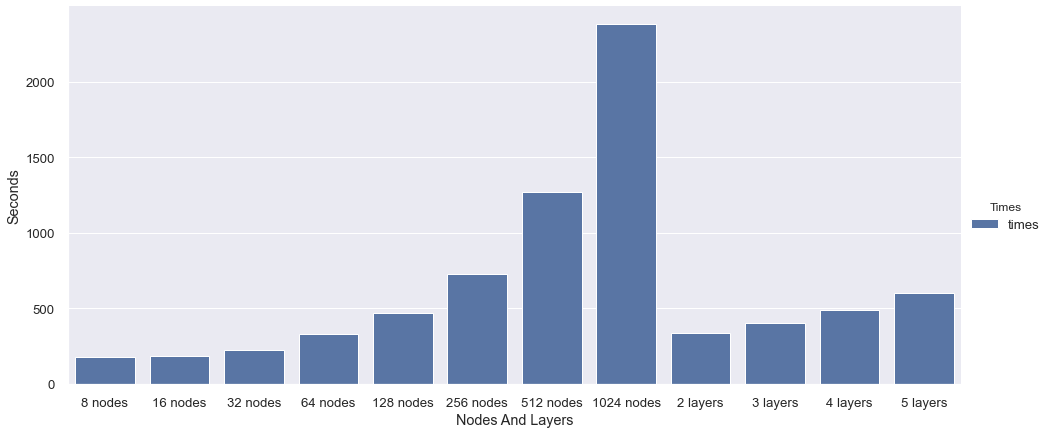

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
layers=[str(i) for i in layers]
nodes=[str(i) for i in nodes]
sns.set(font_scale=1.2)
data={'Nodes And Layers':[str(i)+" nodes" for i in nodes]+[str(i)+" layers" for i in layers]
      ,'times':timesnodes+timeslayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Nodes And Layers", var_name="Times", value_name="Seconds")
sns.catplot(x='Nodes And Layers', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)